In [1]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import load_mpl_presets, mpl_loc, fancy_legend, named_colors
import numpy as np
import vice
import sys
import os
sys.path.append("..")
from src import analytic
print(sys.version_info)
load_mpl_presets()

/var/home/johnson.7419.local/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


sys.version_info(major=3, minor=10, micro=4, releaselevel='final', serial=0)


/home/johnson.7419/tmp/ipykernel_3224/1475359845.py:42: RuntimeWarning: invalid value encountered in log10
  eqs[j] = np.log10(zeq(13.2, **kwargs) / vice.solar_z['o'])
/home/johnson.7419/Desktop/Research/galchem/outflows/notebooks/../src/analytic.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / s
/home/johnson.7419/Desktop/Research/galchem/outflows/notebooks/../src/analytic.py:39: RuntimeWarning: invalid value encountered in double_scalars
  term1 *= (1 - m.exp(-time / self.harmonic_timescale(self.taudep,
/home/johnson.7419/Desktop/Research/galchem/outflows/notebooks/../src/analytic.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / s
/home/johnson.7419/Desktop/Research/galchem/outflows/notebooks/../src/analytic.py:39: RuntimeWarning: invalid value encountered in double_scalars
  term1 *= (1 - m.exp(-time / self.harmonic_timescale(self.taudep,


9.090909090909092
4.761904761904762
-7.142857142857142
-24.999999999999996


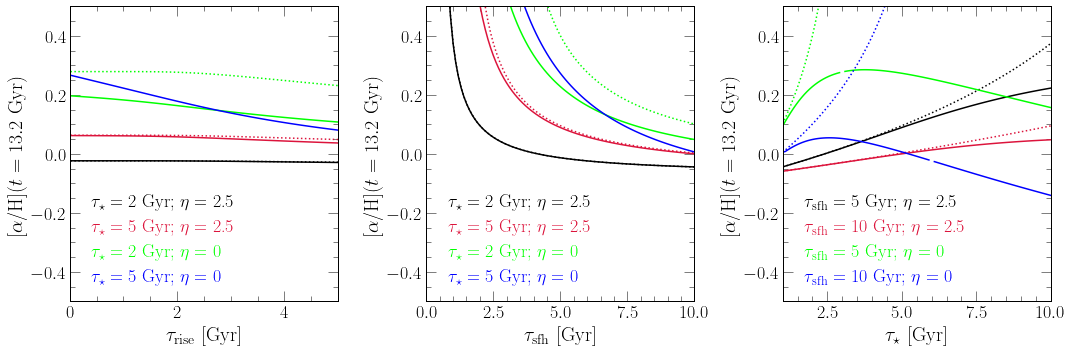

In [30]:
fig = plt.figure(figsize = (15, 5))
axes = []
for i in range(3):
    axes.append(fig.add_subplot(131 + i))
    axes[i].set_ylabel(r"[$\alpha$/H]($t = 13.2$ Gyr)")
axes[0].set_xlabel(r"$\tau_\text{rise}$ [Gyr]")
axes[0].set_xlim([0, 5])
axes[0].set_ylim([-0.5, 0.5])
axes[1].set_xlabel(r"$\tau_\text{sfh}$ [Gyr]")
axes[1].set_xlim([0, 10])
axes[1].set_ylim([-0.5, 0.5])
axes[2].set_xlabel(r"$\tau_\star$ [Gyr]")
axes[2].set_xlim([1, 10])
axes[2].set_ylim([-0.5, 0.5])

taustar = [2, 5, 2, 5]
eta = [2.5, 2.5, 0, 0]
colors = ["black", "crimson", "lime", "blue"]

Zalpha = analytic.Zalpha()

for i in range(len(taustar)):
    xvals = np.linspace(0.01, 5, 100)
    yvals = len(xvals) * [0.]
    eqs = len(xvals) * [0.]
    Zalpha.taustar = taustar[i]
    Zalpha.eta = eta[i]
    if Zalpha.eta == 0:
        Zalpha.y_alpha = 0.0029
    elif Zalpha.eta == 2.5:
        Zalpha.y_alpha = 0.015
    for j in range(len(xvals)):
        Zalpha.taurise = xvals[j]
        yvals[j] = np.log10(Zalpha(13.2) / vice.solar_z['o'])
        kwargs = {
            "yalpha": Zalpha.y_alpha,
            "eta": Zalpha.eta,
            "taurise": Zalpha.taurise,
            "taustar": Zalpha.taustar,
            "tausfh": Zalpha.tausfh
        }
        eqs[j] = np.log10(zeq(13.2, **kwargs) / vice.solar_z['o'])
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": r"$\tau_\star = %g$ Gyr; $\eta$ = %g" % (Zalpha.taustar, Zalpha.eta)
    }
    axes[0].plot(xvals, yvals, **kwargs)
    kwargs["label"] = None
    kwargs["linestyle"] = ":"
    axes[0].plot(xvals, eqs, **kwargs)

kwargs = {
    "loc": mpl_loc("lower left"),
    "handlelength": 0,
    "ncol": 1
}
leg = axes[0].legend(**kwargs)
fancy_legend(leg, colors)

Zalpha.taurise = 2
for i in range(len(taustar)):
    xvals = np.linspace(0.1, 10, 100)
    yvals = len(xvals) * [0.]
    eqs = len(xvals) * [0.]
    Zalpha.taustar = taustar[i]
    Zalpha.eta = eta[i]
    if Zalpha.eta == 0:
        Zalpha.y_alpha = 0.0029
    elif Zalpha.eta == 2.5:
        Zalpha.y_alpha = 0.015
    for j in range(len(xvals)):
        Zalpha.tausfh = xvals[j]
        yvals[j] = np.log10(Zalpha(13.2) / vice.solar_z['o'])
        kwargs = {
            "yalpha": Zalpha.y_alpha,
            "eta": Zalpha.eta,
            "taurise": Zalpha.taurise,
            "taustar": Zalpha.taustar,
            "tausfh": Zalpha.tausfh
        }
        eqs[j] = zeq(13.2, **kwargs)
        if eqs[j] > 0:
            eqs[j] = np.log10(eqs[j] / vice.solar_z['o'])
        else:
            eqs[j] = float("nan")
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": r"$\tau_\star = %g$ Gyr; $\eta$ = %g" % (Zalpha.taustar, Zalpha.eta)
    }
    axes[1].plot(xvals, yvals, **kwargs)
    kwargs["label"] = None
    kwargs["linestyle"] = ":"
    axes[1].plot(xvals, eqs, **kwargs)

kwargs = {
    "loc": mpl_loc("lower left"),
    "handlelength": 0,
    "ncol": 1
}
leg = axes[1].legend(**kwargs)
fancy_legend(leg, colors)
        
tausfh = [5, 10, 5, 10]
for i in range(len(tausfh)):
    xvals = np.linspace(1, 10, 100)
    yvals = len(xvals) * [0.]
    eqs = len(xvals) * [0.]
    Zalpha.tausfh = tausfh[i]
    Zalpha.eta = eta[i]
    if Zalpha.eta == 0:
        Zalpha.y_alpha = 0.0029
    elif Zalpha.eta == 2.5:
        Zalpha.y_alpha = 0.015
    for j in range(len(xvals)):
        Zalpha.taustar = xvals[j]
        yvals[j] = np.log10(Zalpha(13.2) / vice.solar_z['o'])
        kwargs = {
            "yalpha": Zalpha.y_alpha,
            "eta": Zalpha.eta,
            "taurise": Zalpha.taurise,
            "taustar": Zalpha.taustar,
            "tausfh": Zalpha.tausfh
        }
        eqs[j] = zeq(13.2, **kwargs)
        if eqs[j] > 0:
            eqs[j] = np.log10(eqs[j] / vice.solar_z['o'])
        else:
            eqs[j] = float("nan")
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": r"$\tau_\text{sfh}$ = %g Gyr; $\eta$ = %g" % (Zalpha.tausfh, Zalpha.eta)
    }
    print(Zalpha.harmonic_timescale(Zalpha.taustar / (1 + Zalpha.eta - 0.4), Zalpha.tausfh))
    axes[2].plot(xvals, yvals, **kwargs)
    kwargs["label"] = None
    kwargs["linestyle"] = ":"
    axes[2].plot(xvals, eqs, **kwargs)
    
kwargs = {
    "loc": mpl_loc("lower left"),
    "ncol": 1,
    "handlelength": 0
}
leg = axes[2].legend(**kwargs)
fancy_legend(leg, colors)

plt.tight_layout()
plt.show()

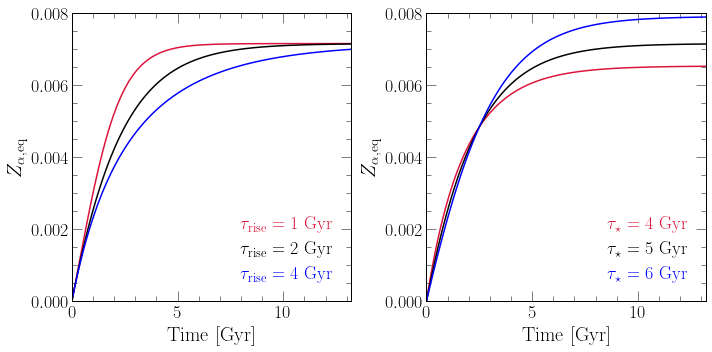

In [12]:
fig = plt.figure(figsize = (10, 5))
axes = []
for i in range(2):
    axes.append(fig.add_subplot(121 + i))
    axes[i].set_xlabel("Time [Gyr]")
    axes[i].set_ylabel(r"$Z_{\alpha,\text{eq}}$")
    axes[i].set_xlim([0, 13.2])
    axes[i].set_ylim([0, 0.008])
    axes[i].set_yticks([0, 0.002, 0.004, 0.006, 0.008])

colors = ["crimson", "black", "blue"]
taurise = [1, 2, 4]
taustar = [4, 5, 6]

def zeq(t, yalpha = 0.015, eta = 2.5, taurise = 2, taustar = 5, tausfh = 5):
    if t == 0: return 0
    denominator = 1 + eta - 0.4
    denominator += taustar * np.exp(-t / taurise) / (taurise * (1 - np.exp(-t / taurise)))
    denominator -= taustar / tausfh
    return yalpha / denominator

xvals = np.linspace(0, 13.2, 100)
for i in range(len(taurise)):
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": r"$\tau_\text{rise}$ = %g Gyr" % (taurise[i])
    }
    yvals = [zeq(x, taurise = taurise[i]) for x in xvals]
    axes[0].plot(xvals, yvals, **kwargs)
    
for i in range(len(taustar)):
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": r"$\tau_\star$ = %g Gyr" % (taustar[i])
    }
    yvals = [zeq(x, taustar = taustar[i]) for x in xvals]
    axes[1].plot(xvals, yvals, **kwargs)
    
for i in range(len(axes)):
    kwargs = {
        "loc": mpl_loc("lower right"),
        "bbox_to_anchor": (0.99, 0.01),
        "handlelength": 0
    }
    leg = axes[i].legend(**kwargs)
    fancy_legend(leg, colors)

plt.tight_layout()
plt.show()